<a href="https://colab.research.google.com/github/bonareri/Geopandas-Analysis/blob/main/Displaying_Maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas

In [2]:
!pip install folium

In [3]:
!pip install ipyleaflet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.2 MB/s eta 0:00:00


In [8]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium
from folium import plugins
from folium.plugins import HeatMap

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
!ls /content/drive/MyDrive/geopandas/

ne_110m_admin_0_countries.cpg	       ne_110m_admin_0_countries.shp
ne_110m_admin_0_countries.dbf	       ne_110m_admin_0_countries.shx
ne_110m_admin_0_countries.prj	       ne_110m_admin_0_countries.VERSION.txt
ne_110m_admin_0_countries.README.html


<Axes: >

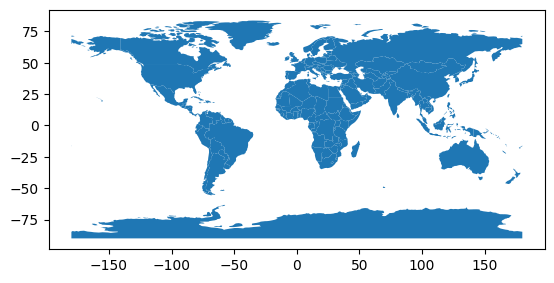

In [24]:
shapefile_path = "/content/drive/My Drive/geopandas/ne_110m_admin_0_countries.shp"
world = gpd.read_file(shapefile_path)

world.plot()

In [26]:
# Display basic information
print(world.info())  # Overview of columns and data types

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 177 entries, 0 to 176
Columns: 169 entries, featurecla to geometry
dtypes: float64(6), geometry(1), int32(24), int64(1), object(137)
memory usage: 217.2+ KB
None


In [27]:
print(world.head())  # Display first few rows

        featurecla  scalerank  LABELRANK                   SOVEREIGNT SOV_A3  \
0  Admin-0 country          1          6                         Fiji    FJI   
1  Admin-0 country          1          3  United Republic of Tanzania    TZA   
2  Admin-0 country          1          7               Western Sahara    SAH   
3  Admin-0 country          1          2                       Canada    CAN   
4  Admin-0 country          1          2     United States of America    US1   

   ADM0_DIF  LEVEL               TYPE TLC                        ADMIN  ...  \
0         0      2  Sovereign country   1                         Fiji  ...   
1         0      2  Sovereign country   1  United Republic of Tanzania  ...   
2         0      2      Indeterminate   1               Western Sahara  ...   
3         0      2  Sovereign country   1                       Canada  ...   
4         1      2            Country   1     United States of America  ...   

      FCLASS_TR     FCLASS_ID     FCLASS_PL 

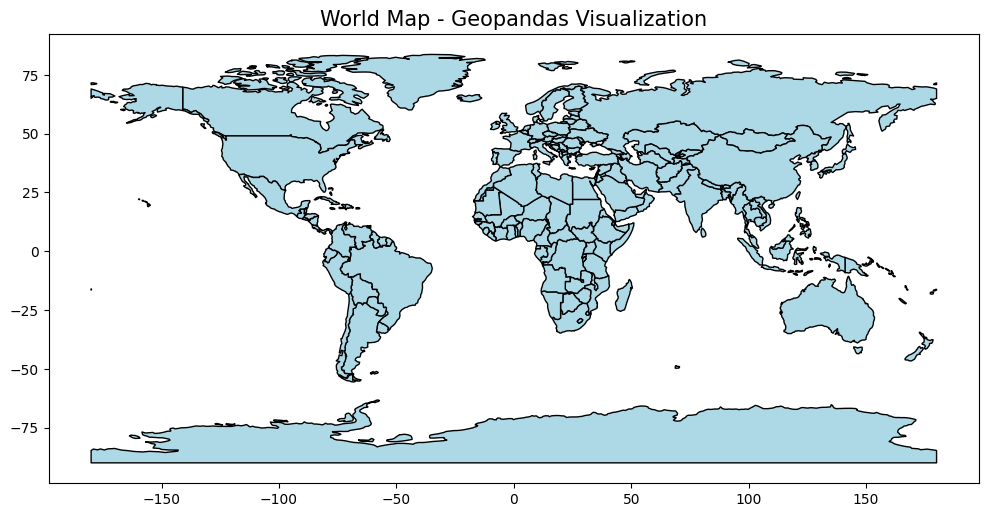

In [28]:
# Customizing the plot
fig, ax = plt.subplots(figsize=(12, 8))
world.plot(ax=ax, color="lightblue", edgecolor="black")

# Adding a title
ax.set_title("World Map - Geopandas Visualization", fontsize=15)

plt.show()

In [30]:
print(world.columns)

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)


In [31]:
print(world["ADMIN"].unique()[:20])  # Show first 20 country names

['Fiji' 'United Republic of Tanzania' 'Western Sahara' 'Canada'
 'United States of America' 'Kazakhstan' 'Uzbekistan' 'Papua New Guinea'
 'Indonesia' 'Argentina' 'Chile' 'Democratic Republic of the Congo'
 'Somalia' 'Kenya' 'Sudan' 'Chad' 'Haiti' 'Dominican Republic' 'Russia'
 'The Bahamas']


In [32]:
continent_map = {
    "Fiji": "Oceania",
    "United Republic of Tanzania": "Africa",
    "Western Sahara": "Africa",
    "Canada": "North America",
    "United States of America": "North America",
    "Kazakhstan": "Asia",
    "Uzbekistan": "Asia",
    "Papua New Guinea": "Oceania",
    "Indonesia": "Asia",
    "Argentina": "South America",
    "Chile": "South America",
    "Democratic Republic of the Congo": "Africa",
    "Somalia": "Africa",
    "Kenya": "Africa",
    "Sudan": "Africa",
    "Chad": "Africa",
    "Haiti": "North America",
    "Dominican Republic": "North America",
    "Russia": "Europe",
    "The Bahamas": "North America",
}

In [33]:
world["continent"] = world["ADMIN"].map(continent_map)

<Axes: >

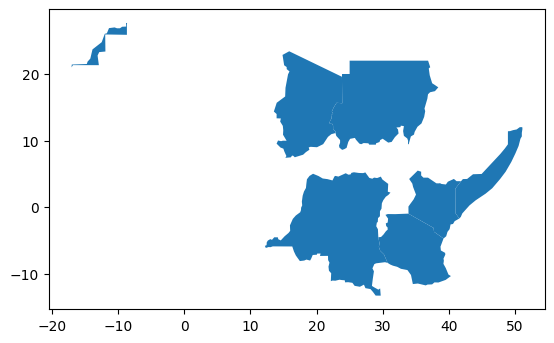

In [34]:
africa = world[world["continent"] == "Africa"]
africa.plot()

In [35]:
m = folium.Map(location=[0, 0], zoom_start=2)
m

In [39]:
def create_map(location, zoom_start=10):
    m = folium.Map(location=location, zoom_start=zoom_start)
    return m

usa_map = create_map(location=[37.0902, -95.7129], zoom_start= 4)
usa_map